# EDA

In [2]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

file_dir=os.getcwd()[:-6]+ 'Models/'
df = pd.read_csv(file_dir+'final_daily.csv')
df = df[['date','price','demand','avg_temp']]

We begin our analysis by examining the variables collected for this study: date, price, demand, and average temperature. Date is a categorical variable that represents the date of the observation, while the other variables are continuous and measured in units of dollars/MWh, MWh, and degrees Celsius, respectively.

In [3]:
df.head()

,date,price,demand,avg_temp
0,2020-01-01,0.575217,324937,5.158036
1,2020-01-02,0.010000,362395,4.493006
2,2020-01-03,16.015000,369431,5.064583
3,2020-01-04,15.604583,361928,4.458333
4,2020-01-05,5.554167,359417,4.066815


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1096 non-null   object 
 1   price     1096 non-null   float64
 2   demand    1096 non-null   int64  
 3   avg_temp  1096 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 34.4+ KB


Looking at the summary statistics of the variables, we find that there are no missing values in the data. However, the price variable has some extreme values, with some daily prices reaching as high as 126 dollars/MWh and even negative values. These outliers could be due to factors such as sudden changes in supply or demand, or errors in the measurement or recording of the data. It will be important to examine these outliers in more detail to determine their impact on our analysis.

In [5]:
df.describe()

,price,demand,avg_temp
count,1096.000000,1096.000000,1096.000000
mean,28.103917,368271.472628,6.356669
std,21.629059,39975.102999,1.995596
min,-0.642083,268184.000000,1.331250
25%,12.313437,337678.000000,4.949628
50%,21.053958,367054.500000,6.420685
75%,40.576042,396921.750000,7.661830
max,126.465417,490924.000000,15.230060


Next, we examine the correlations between the variables. We find that there is a moderate positive correlation between price and demand (r = 0.48), indicating that higher demand tends to drive up the price of electricity. However, the correlation between price and temperature is weak and negative (r = -0.033), suggesting that higher temperatures do not necessarily lead to higher prices. Similarly, the correlation between temperature and demand is also weak and negative (r = -0.093), suggesting that the effect of temperature on demand is relatively small.

<AxesSubplot:>

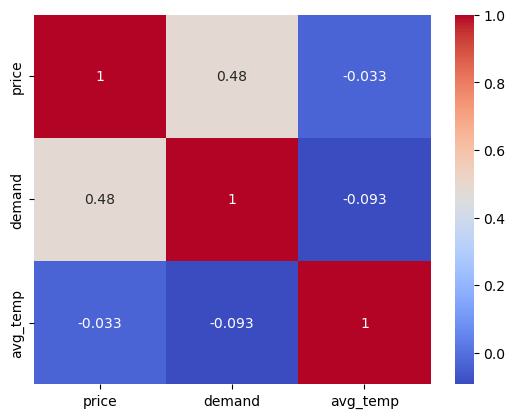

In [6]:
#Heat map
sns.heatmap(df[['price','demand','avg_temp']].corr(),cmap='coolwarm',annot=True)

Overall, these exploratory data analysis techniques provide us with a better understanding of the patterns and relationships in our data and help us identify potential issues or trends that may need to be addressed in our subsequent analysis.

Text(0.5, 0, 'Price')

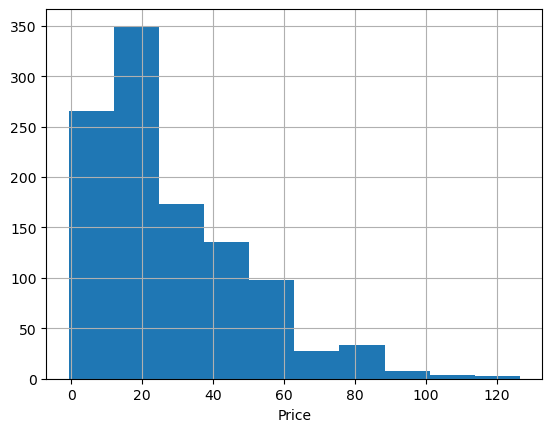

In [10]:
df['price'].hist(bins=10)
plt.xlabel('Price')

Text(0.5, 0, 'Demand')

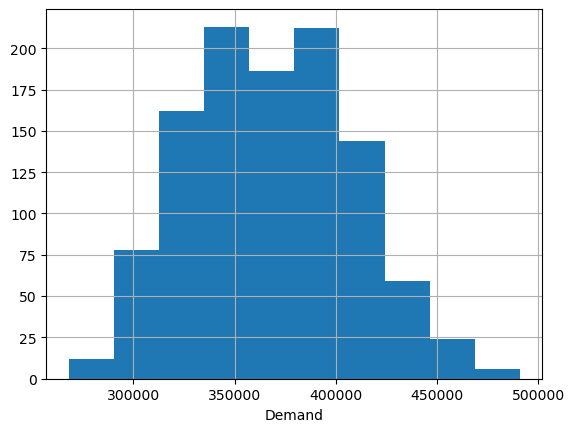

In [11]:
df['demand'].hist(bins=10)
plt.xlabel('Demand')

Text(0.5, 0, 'Temperature')

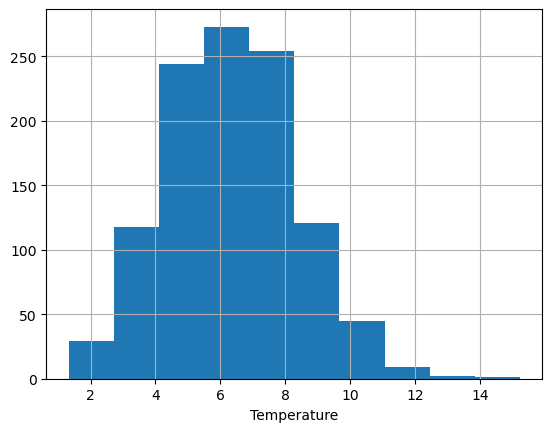

In [12]:
df['avg_temp'].hist(bins=10)
plt.xlabel('Temperature')

Text(0, 0.5, 'Price')

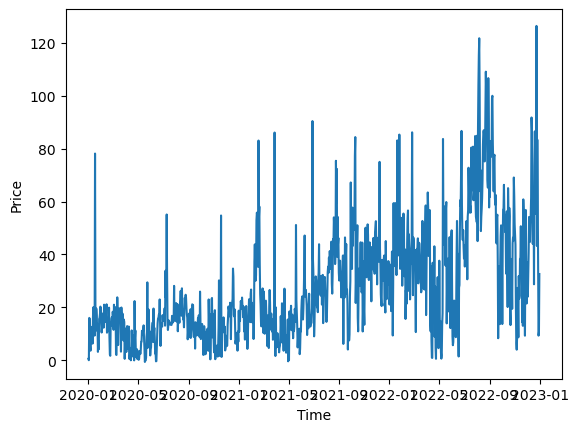

In [20]:
plt.plot(pd.to_datetime(df['date']),df['price'])
plt.xlabel('Time')
plt.ylabel('Price')

Text(0, 0.5, 'Demand')

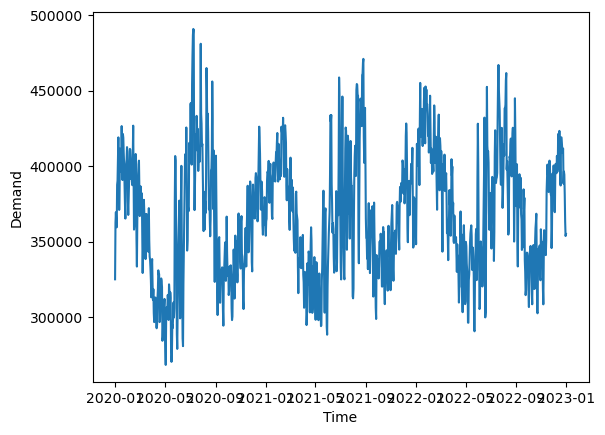

In [18]:
plt.plot(pd.to_datetime(df['date']),df['demand'])
plt.xlabel('Time')
plt.ylabel('Demand')

Text(0, 0.5, 'Temperature')

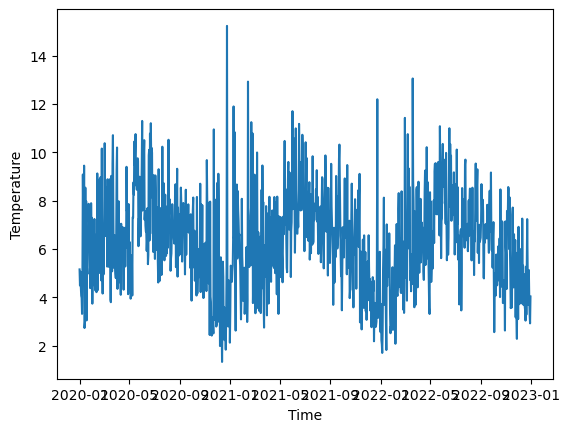

In [19]:
plt.plot(pd.to_datetime(df['date']),df['avg_temp'])
plt.xlabel('Time')
plt.ylabel('Temperature')

Overall, these exploratory data analysis techniques provide us with a better understanding of the patterns and relationships in our data and help us identify potential issues or trends that may need to be addressed in our subsequent analysis.